# CIC prediction

In [1]:
from warnings import simplefilter
simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.forecasting.statsforecast import StatsForecastAutoARIMA

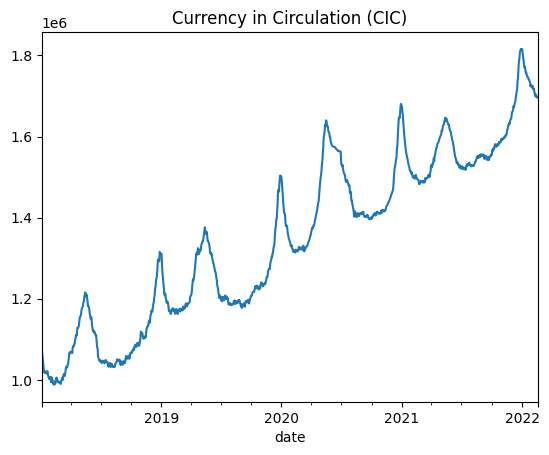

In [3]:
data = pd.read_excel('../../data/CIC.xlsx', parse_dates=['date'], index_col='date')
data['CIC'].plot(title = 'Currency in Circulation (CIC)'); plt.show()

## Section 2: Model Definition

In [63]:
from forecast_combine import model_select as f

from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastAutoTBATS,
    StatsForecastGARCH,
)
from sktime.forecasting.fbprophet import Prophet

In [65]:
ForecastingModels = {
    "Naive": NaiveForecaster(),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True,
                    max_D = 262, max_p= 10, max_q=10, 
                    parallel = True),
    "AutoETS": StatsForecastAutoETS(season_length=262, model='Z'),
    "AutoETS": StatsForecastAutoCES(season_length=262, model='Z'),
    "AutoTheta": StatsForecastAutoTheta(season_length=262),
    "TBATS": StatsForecastAutoTBATS(seasonal_periods=262, use_trend =True, use_boxcox=True),
    "Prophet": Prophet(yearly_seasonality=True, weekly_seasonality=True,
                       add_country_holidays={'country_name': 'Qatar'}),
}

model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'CIC',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            models_d = ForecastingModels,
            freq = 'B',
            mode = 'nbest_average_horizon',
            score = 'RMSE', 
            nbest = 2)

### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


0it [37:33, ?it/s]


<Axes: title={'center': 'Cross Validation Procedure'}, ylabel='Window number'>

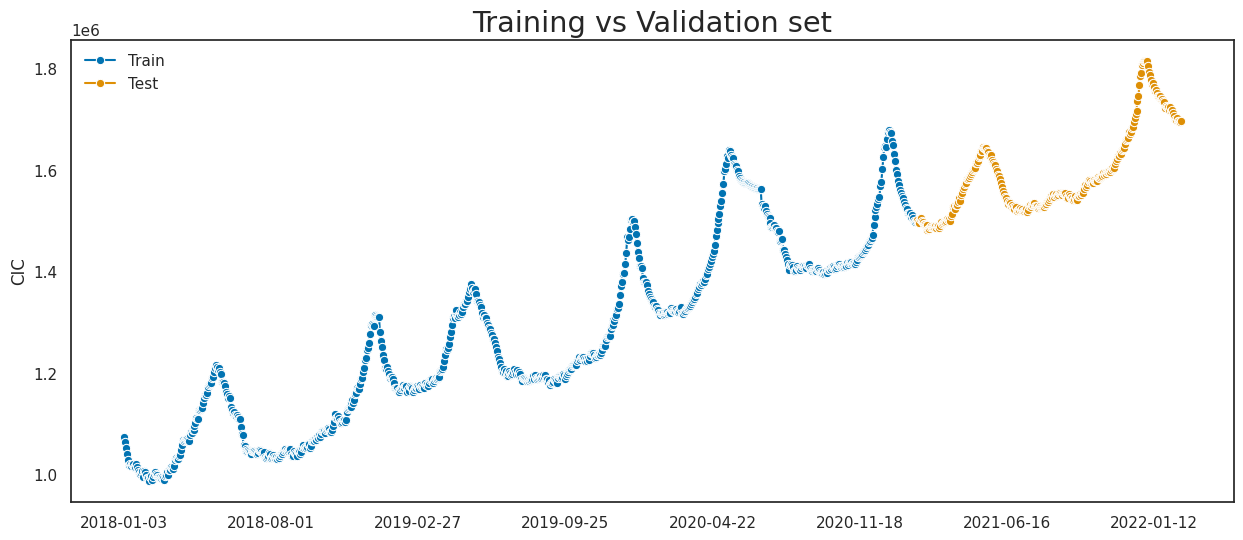

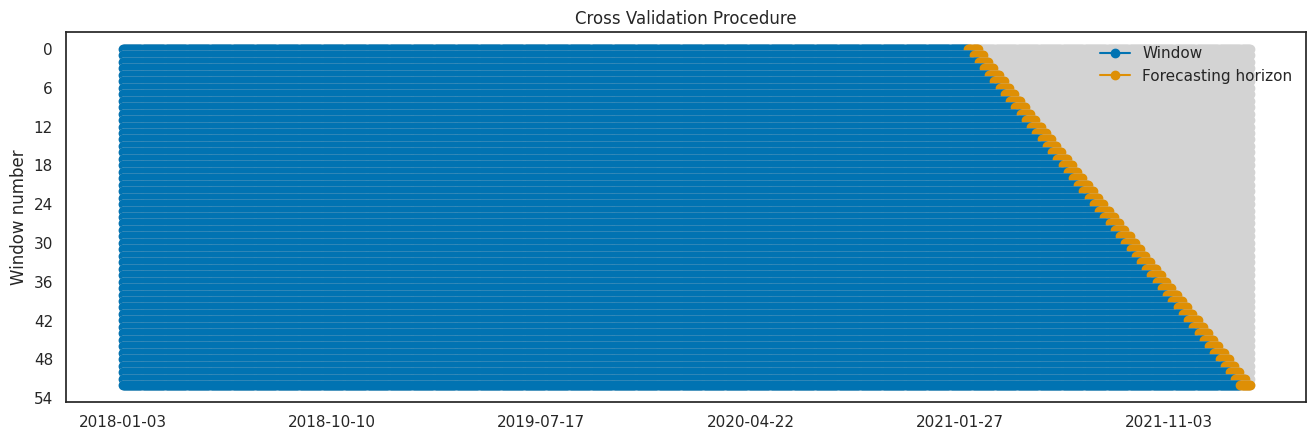

In [67]:
_ = model.LF_list[0].split_procedure_summary()

model.LF_list[0].plot.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')

model.LF_list[0].plot.plot_cv_procedure(xlabel='')

### In Sample Evaluation

In [31]:
lf_fit= LF.fit(on='train')
pred = lf_fit.insample_predictions()
display(pred.head())

798it [00:08, 93.24it/s]


,cutoff,horizon,date,y_pred,y_true,Abs_diff
0,2018-01-03,1,2018-01-04,1.073964e+06,1063447,10517.232494
1,2018-01-03,2,2018-01-05,1.062846e+06,1052060,10785.839654
2,2018-01-03,3,2018-01-08,1.051049e+06,1040976,10073.224130
3,2018-01-03,4,2018-01-09,1.039713e+06,1027846,11867.211355
4,2018-01-03,5,2018-01-10,1.026311e+06,1019181,7130.446075


In [12]:
insample_perf_summary = lf_fit.insample_perf()
display(insample_perf_summary['cutoff'].tail())
display(insample_perf_summary['horizon'])

,RMSE,MAE,MAPE,R2,MedianAE
cutoff,,,,,
2021-01-18,4370.851837,3670.005666,0.240944,0.851790,3802.300092
2021-01-19,4640.232617,4007.764989,0.263685,0.771203,4553.027132
2021-01-20,4400.086832,3824.041109,0.252521,0.765758,4406.770091
2021-01-21,4259.619316,3591.910998,0.237585,0.747845,4406.770091
2021-01-22,3922.135055,3203.738592,0.212329,0.752891,2719.836762


,RMSE,MAE,MAPE,R2,MedianAE
horizon,,,,,
1,6674.482022,4938.684703,0.390607,0.998511,3758.052208
2,6668.399103,4933.989911,0.389927,0.998515,3758.052208
3,6657.519277,4921.474262,0.388709,0.998521,3742.157672
4,6648.020290,4909.830949,0.387561,0.998526,3718.532333
5,6637.955697,4902.280004,0.386599,0.998530,3718.532333
6,6634.535823,4898.136402,0.386039,0.998532,3718.532333
7,6636.718645,4902.014644,0.386210,0.998530,3742.157672
8,6638.640648,4905.598537,0.386364,0.998529,3758.052208
9,6637.461168,4902.634977,0.386016,0.998529,3742.157672


(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'RMSE By cutoff'}>,
        <Axes: title={'center': 'RMSE By horizon'}>], dtype=object))

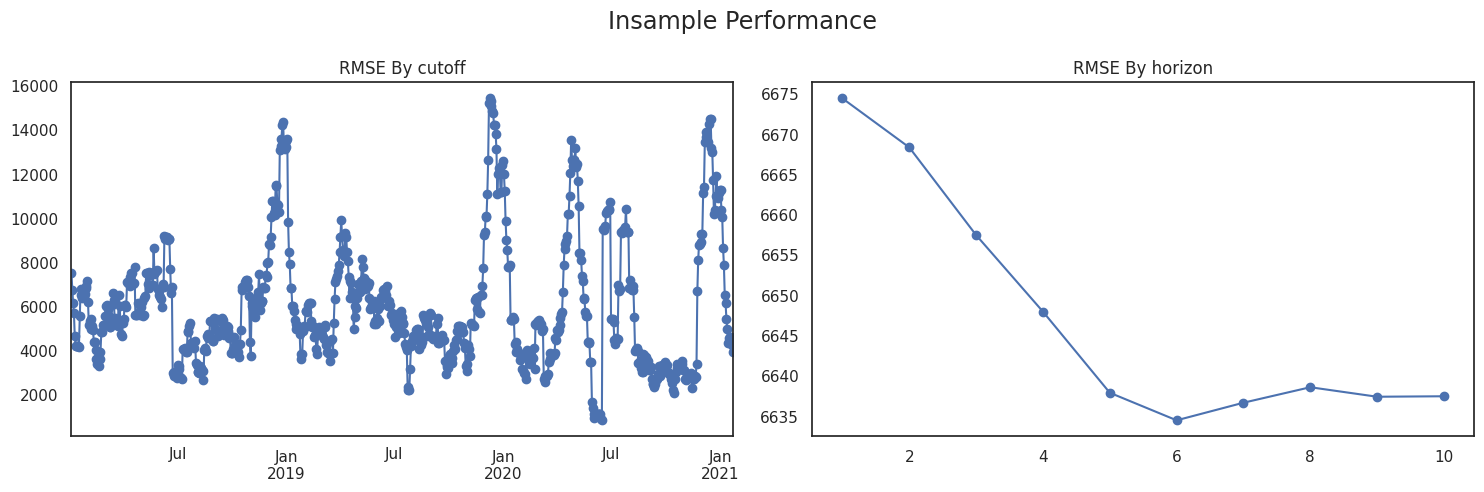

In [13]:
lf_fit.plot.plot_insample_performance(metric='RMSE')

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'MAPE By cutoff'}>,
        <Axes: title={'center': 'MAPE By horizon'}>], dtype=object))

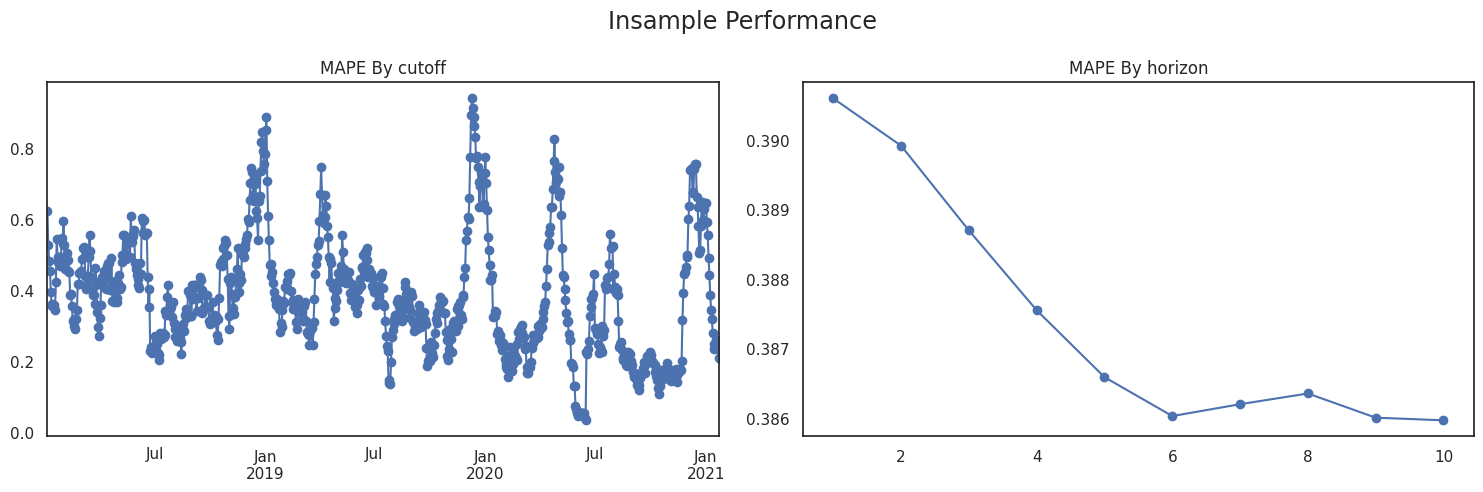

In [14]:
lf_fit.plot.plot_insample_performance(metric='MAPE')

### Out-Of-sample Evaluation

In [68]:
lf_eval= model.evaluate()


Start forecaster Naive evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.047 minutes

Start forecaster AutoARIMA evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.584 minutes

Start forecaster AutoETS evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 2.091 minutes

Start forecaster AutoTheta evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel
Evaluation time: 0.546 minutes

Start forecaster TBATS evalution....
 Depending on the forecaster this step may take couple of minutes. Please don't kill the kernel


In [45]:
lf_eval.summary_results()

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg MAPE,Avg RMSE
0,53,0.638908,0.003391,808,1068,2021-02-05,2022-02-04,0.009579,17891.54406


In [50]:
lf_eval.summary_horizon()

,RMSE,MAE,MAPE,R2,MedianAE
horizon,,,,,
1,7102.696629,5174.098608,0.321985,0.992955,3453.411924
2,10410.507397,7339.961613,0.454188,0.985012,6071.147439
3,14635.992053,10242.792148,0.628863,0.970376,7567.053177
4,17010.161591,12537.357897,0.772226,0.960199,9533.129300
5,18965.033611,14039.978747,0.861168,0.950230,12066.818902
6,22626.053016,16559.621029,1.011835,0.929218,12525.412236
7,25431.538181,19023.979652,1.164458,0.910937,15105.459035
8,29160.657984,22045.149047,1.349564,0.882671,16021.289100
9,32377.016790,24287.365215,1.485023,0.856688,17784.241693


<Axes: title={'center': 'Out of Sample Performance - Average per Horizons'}, xlabel='Horizon', ylabel='MAPE'>

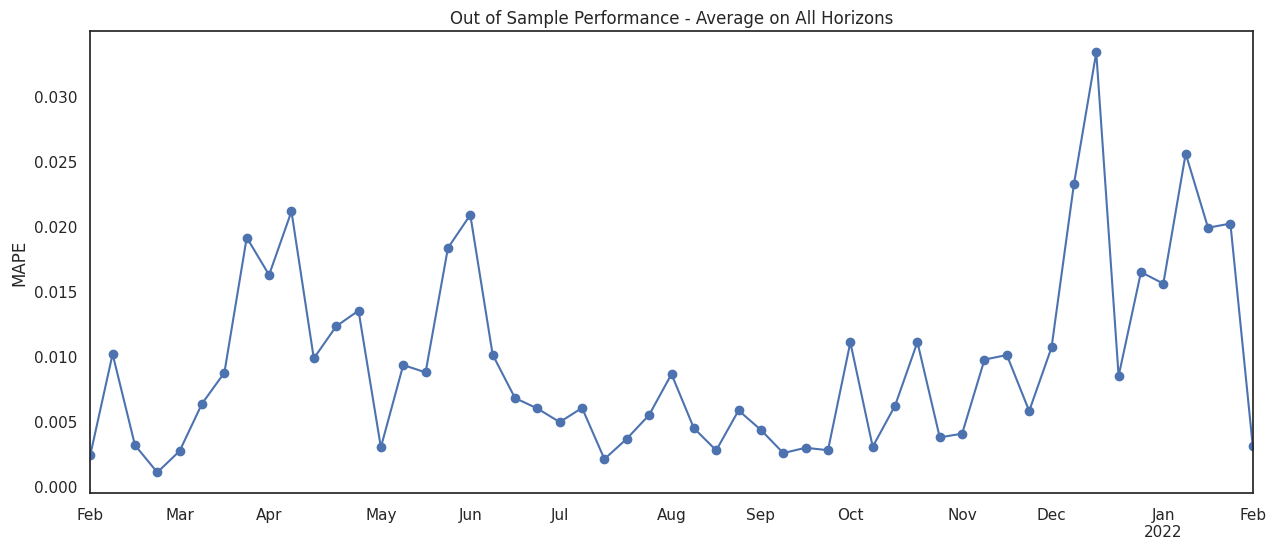

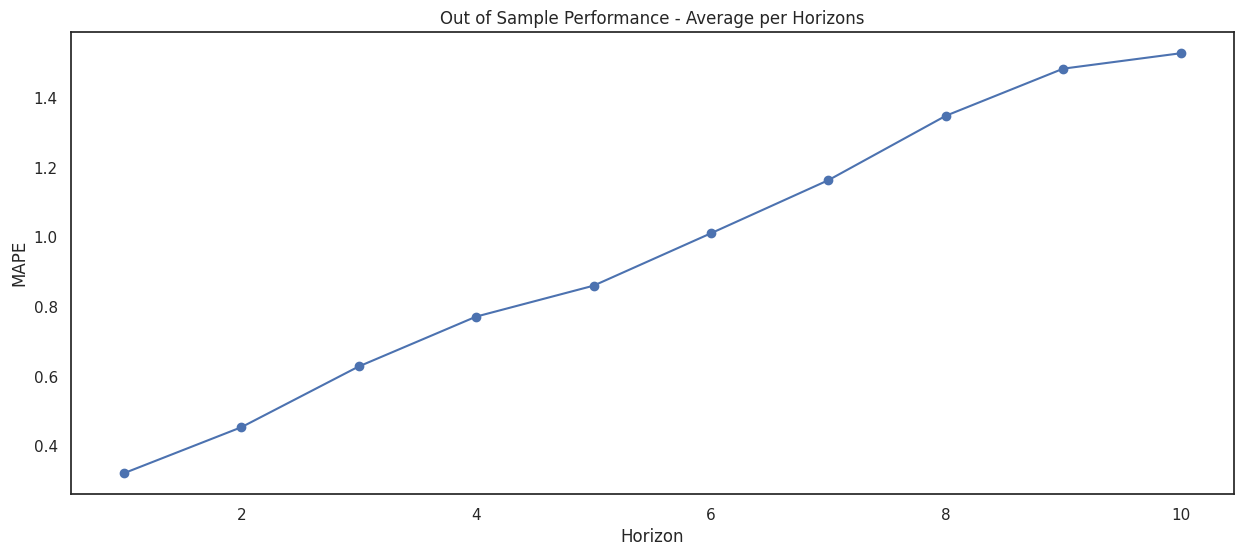

In [49]:
lf_eval.plot.plot_oos_score(score = 'MAPE')
lf_eval.plot.plot_oos_horizon(score = 'MAPE', xlabel = 'Horizon')

## Section 4: Generate predictions

In [53]:
# First Fit on all the sample
LF.fit(on ='all')
# Predict
y_pred, y_pred_ints = LF.predict()

(<Figure size 1300x500 with 1 Axes>,
 <Axes: title={'center': 'ARIMA Prediction'}, ylabel='CIC'>)

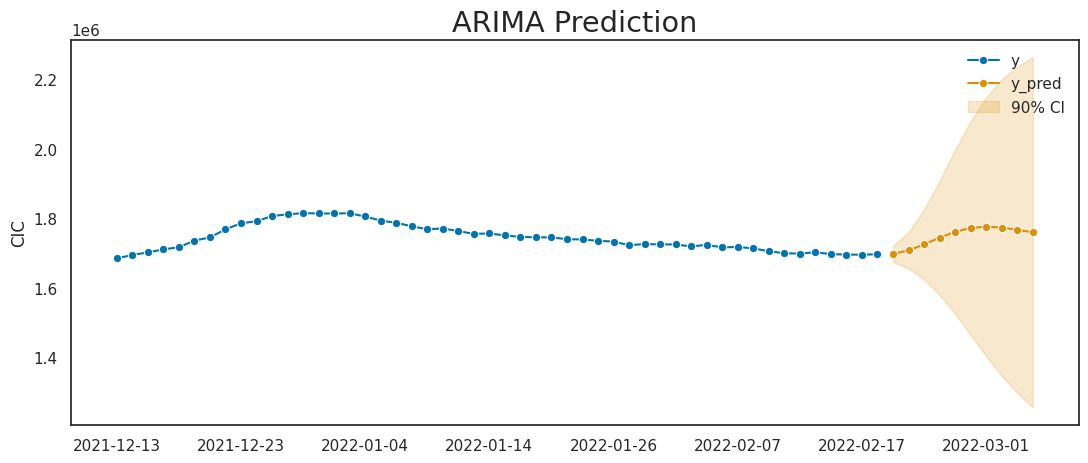

In [54]:
LF.plot.plot_prediction(y_pred, y_pred_ints, 
                        labels=['y', 'y_pred'], 
                        title = 'ARIMA Prediction', 
                        figsize = (13,5))

### Section 5: Update Predictions when new data comes in

In [59]:
# create a dataframe with the new data
newdata = pd.concat([data, 
                     y_pred.to_frame()
                    ])

### Either with or without refitting the model

(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'Prediction'}, ylabel='CIC'>)

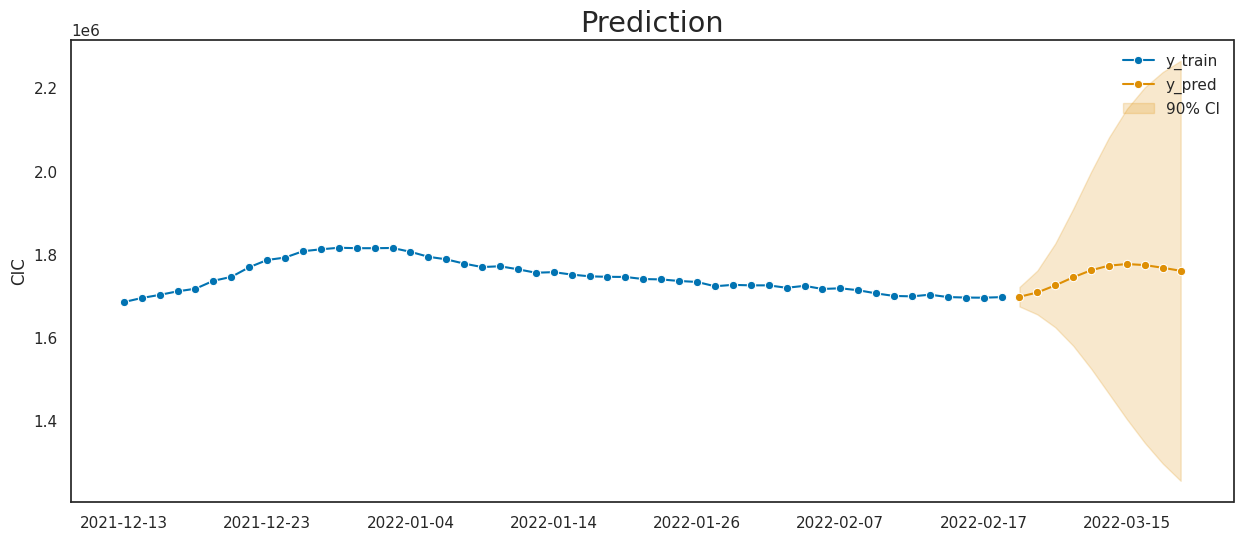

In [61]:
y_pred, y_pred_ints = LF.update(newdata = newdata, refit=False)
LF.plot.plot_prediction(y_pred, y_pred_ints)